In [1]:
from support import *

import numpy as np

from astropy.io import fits
from astropy.stats import sigma_clipped_stats

from photutils.aperture import CircularAperture
from photutils.detection import DAOStarFinder
from photutils.psf import PSFPhotometry
from photutils.psf import CircularGaussianPRF

import matplotlib.pyplot as plt

from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord

from astropy.coordinates import Angle
import astropy.units as u

import pandas as pd

In [3]:
np.rad2deg(0.7270155480560998),147352.625/3600

(np.float64(41.654922544005), 40.93128472222222)

In [2]:
fname = ['R2049197P.fit']
# Read fits
ffile = fits.open(f'C:\\Users\\lrikozavr\\work\\LAO\\2024_04_27\\LEO_Meade902\\N18340\\{fname[0]}')
data = ffile[0].data
head = ffile[0].header

FOV = (3.20264288, 4.27019051)

In [3]:
head

SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  576                                                  
NAXIS2  =                  768                                                  
                                                                                
BSCALE  =                  1.0                                                  
BZERO   =                    0                                                  
DATAMIN =                    0                                                  
DATAMAX =                65535                                                  
TYPE    =                       1                                               
                                                                                
DATE-OBS= '2024-04-27'      

In [25]:
np.float32(coord.dec),np.float64(coord.dec),coord.dec

(np.float32(37.136932),
 np.float64(37.13693138888889),
 <Latitude 37.13693139 deg>)

In [29]:
coord.ra.radian

np.float64(4.991628643456444)

In [45]:
temp = coord.cartesian
temp.transform()

TypeError: CartesianRepresentation.transform() missing 1 required positional argument: 'matrix'

In [32]:
%%timeit
spherical_to_cartesian(1,coord.ra.radian,np.pi/2. - coord.dec.radian)

246 µs ± 61.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
%%timeit
coord.cartesian

32.6 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [35]:
fi = np.deg2rad(49.917611730650556)
center_A = Angle(f'{head["AZ-C"]}').to_value(u.rad)
center_h = Angle(f'{head["ALT-C"]}').to_value(u.rad)
center_hour_angle, center_declination = horizontal_to_equatorial(center_A,center_h,fi)

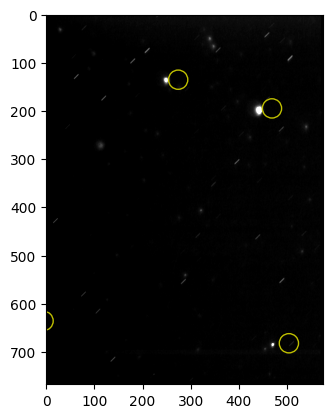

In [ ]:
# формування списку координат для побудови зображення
xy = [[X[i], Y[i]] for i in range(len(X))]
# Draw data
plt.imshow(data, vmin=np.median(data), vmax=3 * np.median(data), cmap="Greys_r")
_ = CircularAperture(xy, r=20.0).plot(color="y")
#plt.colorbar()
plt.show()

In [57]:
s = ShiftFinder(xy_1,xy_2,N=xy_1.shape[0],gap_value=xy_1.shape[0]-3,aperture=[3,np.deg2rad(3)])
xy_test = s.one_by_one(xy_1.shape[0])
xy_test

array([10, -1,  2, 56])

In [1]:
from astropy.io import fits

fname = ['R2048554P.fit','R1544516P.fit','R2035345P.fit','R2050154P.fit']
# Read fits
#ffile = fits.open(f'C:\\Users\\lrikozavr\\work\\LAO\\2024_04_27\\LEO_Meade902\\N18340\\{fname[0]}')
ffile = fits.open(f'{fname[0]}')

config = {
    "location": {
        "lon" : 23.954290051419513,
        "lat" : 49.91760760673526,
        "height" : 100
    },
    "FOV": (3.20264288, 4.27019051),
    "scale": 3
}

In [2]:
from support import PlateRecognize
import numpy as np

plane = PlateRecognize(ffile,config)
# Встановлюємо нове, правильне, значення центру

In [7]:
plane.calibration(mod = 5, aperture=[3,np.deg2rad(3)])


i,j,deep: 0 0 26 idx: [  0   2   6 127  -1  -1  -1  31  66  -1  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1  93  55 163  -1  -1 149  -1]
[20]
i,j,deep: 0 0 26 idx: [ 20   2   6 127  -1  -1  -1  31  66  -1  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1  93  -1 163  -1  -1 149  -1]
i,j,deep: 0 0 26 idx: [  0   2   6 127  -1  -1  -1  31  66  -1  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1  93  55 163  -1  -1 149  -1]
[20]
i,j,deep: 0 0 26 idx: [ 20   2   6 127  -1  -1  -1  31  66  -1  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1  93  -1 163  -1  -1 149  -1]
Count of stars with oponent:  10
Agulare distance  0d00m00.00003078s
Plane distance:
mean:	 [-1.28846074e-06 -8.38474565e-07]
median:	 [-0.1845457  -0.05336661]
std:	 [1.53642415 0.45165869]


In [5]:
for i in [10]:
    print(i)

10


In [7]:
plane.calibration(mod = 12, aperture=[3,np.deg2rad(3)])

i,j,deep: 0 4 26 idx: [  4   2   6 127  -1  -1  -1  31  66  -1  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1  93 141 163  -1 192 131  -1]
i,j,deep: 0 9 26 idx: [  9   2   6 127  -1  -1  -1  31  66  -1  -1  -1  -1 121  -1  -1 198  -1
  -1  -1  93 141 163  -1  -1 149  -1]
i,j,deep: 0 11 26 idx: [ 11   2   6 127  -1  99  -1  31  66  -1  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1 143 141 163  -1  -1 149  -1]
i,j,deep: 0 12 26 idx: [ 12   2   6 127  -1  99  -1  31  66  -1  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1 143 141 163  -1  -1 149  -1]
i,j,deep: 0 14 26 idx: [ 14   2   6 127  -1  -1   9  31  66  -1  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1  93 141 163  -1  -1 149  -1]
i,j,deep: 0 15 26 idx: [ 15   2   6 127  -1  -1  -1  31  66  -1  -1  76  -1  -1  -1  -1 198  -1
  -1  -1  93 141 163  -1  -1 149  -1]
i,j,deep: 0 16 26 idx: [ 16   2   6 127  -1  -1  -1  31  66  99  -1  -1  -1  -1  -1  -1 198  -1
  -1  -1  93 141 163  -1  -1 149  -1]
i,j,deep: 0 17 26 idx: [ 17   2   6 127  -1  -1  -1  31  66  -1 

In [16]:
plane.plane_objects_index_array_of_stars

array([ 20,   2,   6, 127,  -1,  -1,  -1,  31,  66,  -1,  -1,  -1,  -1,
        -1,  -1,  -1, 198,  -1,  -1,  -1,  93,  -1, 163,  -1,  -1, 149,
        -1])

In [126]:
plane.calibration(mod = 10, aperture=[3,np.deg2rad(3)])

Count of stars with oponent:  10
Agulare distance  1d25m13.11897016s
Plane distance:
mean:	 [-27.36678316 253.83015349]
median:	 [-27.14909281 253.27492409]
std:	 [5.3724622 1.7781647]


In [71]:
plane.plane_objects_index_array_of_stars

array([ 20,   2,   6, 127,  -1,  -1,  -1,  -1,  66,  -1,  -1,  -1,  -1,
       137,  -1,  -1, 198,  -1,  -1,  -1,  93, 141, 163,  -1,  -1,  -1,
        -1])

In [74]:
plane.plane_objects_index_array_of_stars

array([ 20,   2,   6, 127,  -1,  -1,  -1,  31,  66,  -1,  -1,  -1,  -1,
        -1,  -1,  -1, 198,  -1,  -1,  -1,  -1, 141, 163,  -1,  -1, 149,
        -1])

In [111]:
plane.plane_objects_index_array_of_stars

array([ -1,   2,   6, 127,  -1,  -1,  -1,  31,  66,  -1,  -1,  -1,  -1,
        -1,  -1,  -1, 198,  -1,  -1,  -1,  93, 141, 163,  -1,  -1, 149,
        -1])

In [12]:
star_index = plane.plane_objects_index_array_of_stars[np.argwhere(plane.plane_objects_index_array_of_stars >= 0).flatten()]
obj_index = np.argwhere(plane.plane_objects_index_array_of_stars >= 0).flatten()
star_index, obj_index

(array([ 20,   2, 127,  31,  66, 198,  93, 141, 149]),
 array([ 0,  1,  3,  7,  8, 16, 20, 21, 25]))

In [13]:
plane.plane_objects[obj_index] - plane.RADEC_to_PlaneXY(plane.stars).transpose()[star_index]

array([[-0.90557359,  0.39379963],
       [ 0.43848879,  0.00755269],
       [ 0.46187298,  0.05916286],
       [ 2.2531827 , -0.50165765],
       [-0.40180707, -0.2325363 ],
       [-0.91040045, -0.25406466],
       [-1.85577556,  0.612694  ],
       [-0.34435922,  0.25964488],
       [ 1.35877867, -0.33330079]])

In [46]:
xy_2 = plane.RADEC_to_PlaneXY(plane.stars).transpose()
xy_1 = plane.plane_objects

In [47]:
from support import ShiftFinder
shift = ShiftFinder(xy_1,xy_2,N = xy_1.shape[0], gap_value = xy_1.shape[0] - 10, aperture=[3,np.deg2rad(3)])

In [48]:
idx = shift.one_by_one(1)
none_zero_index = np.argwhere(idx >= 0).flatten()

In [49]:
n_0 = none_zero_index
n_1 = idx[n_0]
n_0,n_1

(array([ 1,  2,  3,  7,  8, 16, 20, 21, 22, 25]),
 array([  2,   6, 127,  31,  66, 198,  93, 141, 163, 149]))

In [41]:
from astropy.stats import sigma_clipped_stats
mean, _, __ = sigma_clipped_stats(shift.main_shift_array[n_0,n_1],axis=0)

In [42]:
__, mean

(array([0.91287754, 1.64896895]), array([ 1.37954469, -0.32779467]))

In [50]:
shift.main_shift_array[0,20]

array([ 0.98749262, -1.16060214])

In [44]:
shift.main_shift_array[n_0,n_1]

array([[ 0.43855383,  1.55357366],
       [ 2.56033046, -1.8552097 ],
       [ 0.46564675,  1.44339674],
       [ 2.30835281,  1.78986718],
       [ 0.46424353, -2.09542647],
       [ 0.94518667, -1.84294162],
       [ 1.95430214, -1.25190879],
       [ 0.43127571, -0.92474378],
       [ 2.828495  , -1.90589524],
       [ 1.39906001,  1.81134131]])

In [45]:
index = shift.check_window(mean,shift.main_shift_array[n_0,n_1])
index

array([9, 5, 6, 2, 4, 3, 0, 7, 1, 8])

In [52]:
shift.check_window(mean,np.array([shift.main_shift_array[0,20]]))

array([0])

In [33]:
for i_i in range(n_0.shape[0]):
    if(not i_i in index):
        print(i_i,-1)


In [22]:
index = shift.check_window(shift.main_shift_array[none_zero_index,idx[none_zero_index]].mean(axis=0),shift.main_shift_array[none_zero_index,idx[none_zero_index]])

In [28]:
idx_non = idx[none_zero_index]

In [29]:
idx_non[index]

array([ 13,  61,  64, 264, 275,   7, 260,  65,  39, 247, 101,  12,  25,
        84,  86,  66])

In [23]:
plane.plane_objects[index] - plane.RADEC_to_PlaneXY(plane.stars).transpose()[idx[index]]

NameError: name 'index' is not defined

In [8]:
# Рахуємо константи кадру
plane.plane_constant(mod="medium")

Plane constant calculation mod:  medium
6 parameters plane calibration
Plane constants precision
mean:	 2.1316282072803005e-15
median:	 0.00988357175509691
std:	 0.1542753996656163
RADEC precision in angular seconds
mean:	 -0.5694124439678445
median:	 -0.5820164983880298
std:	 2.1582194843358864


In [18]:
import numpy as np

x = np.linspace(0,576,20)
y = np.linspace(0,768,20)
xv, yv = np.meshgrid(x,y)

In [12]:
grid_xy = np.append(xv.flatten(),yv.flatten()).reshape(2,400).transpose()
new_grid_xy = plane.plane_constants.real_coordinate(grid_xy)

In [13]:
new_xv = new_grid_xy.transpose()[0,:].reshape(20,20)
new_yv = new_grid_xy.transpose()[1,:].reshape(20,20)


(0.0, 768.0)

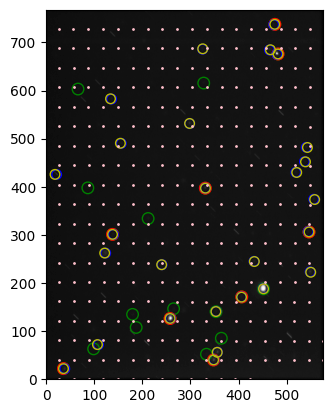

In [14]:
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture

stars = plane.RADEC_to_PlaneXY(plane.stars).transpose()

plt.imshow(plane.data, cmap="Greys_r")
# Проекція зірок на кадр
_ = CircularAperture(stars, r=12.0).plot(color="g")
#
_ = CircularAperture(plane.RADEC_to_PlaneXY(plane.stars).transpose()[plane.plane_objects_index_array_of_stars[np.argwhere(plane.plane_objects_index_array_of_stars >= 0).flatten()]], r=12.0).plot(color="r")
# Об'єкти на кадрі, які знайшов лагоритм
_ = CircularAperture(plane.plane_objects, r=10.0).plot(color="b")
# Врахування констант кадру для об'єктів які знайшов алгоритм
_ = CircularAperture(plane.plane_constants.real_coordinate(plane.plane_objects), r=10.0).plot(color="y")

plt.plot(new_xv, new_yv, marker='o', markersize=1, color='pink', linestyle='none')
plt.xlim((0,576))
plt.ylim((0,768))

In [1]:
from astropy.io import fits

fname = ['R2049197P.fit']
# Read fits
ffile = fits.open(f'C:\\Users\\lrikozavr\\work\\LAO\\2024_04_27\\LEO_Meade902\\N18340\\{fname[0]}')

In [2]:
import numpy as np

config = {
    "location": {
        "lon" : 23.954290051419513,
        "lat" : 49.91760760673526,
        "height" : 100
    },
    "FOV": (3.20264288, 4.27019051)
}

config

{'location': {'lon': 23.954290051419513,
  'lat': 49.91760760673526,
  'height': 100},
 'FOV': (3.20264288, 4.27019051)}

In [3]:
from support import PlateRecognize

In [4]:
plane = PlateRecognize(ffile,config)

In [5]:
plane.calibration()

Count of stars with oponent:  7
Agulare distance  1d25m10.73389631s
Plane distance:
mean:	 [-29.59952704 253.45971547]
median:	 [-29.22633845 253.11271807]
std:	 [3.70337483 0.95937222]


In [6]:
plane.plane_constant()

6 parameters plane calibration
Plane constants precision
mean:	 -9.952673605896833e-13
median:	 0.010273444530952247
std:	 0.1623403560122612
RADEC precision in angular seconds
mean:	 -2.2585990628685793e-05
median:	 -0.5709466559717856
std:	 3.5743323143818846


In [110]:
b = PlaneConstant()

In [57]:
b.__plane_parameters_4__(np.float64([1,2]),np.float64([2,3])).shape[1]

15

In [163]:
a = PlateRecognize(ffile,config)

In [164]:
a.calibration(3)

Agulare distance  1d25m10.73389631s
Plane distance:
mean:	 [-29.59952704 253.45971547]
median:	 [-29.22633845 253.11271807]
std:	 [3.70337483 0.95937222]


In [144]:
index_array = np.argwhere(a.plane_objects_index_array_of_stars >= 0).flatten()
plane_xy = a.plane_objects[index_array] 
real_xy = a.RADEC_to_PlaneXY(a.stars).transpose()[a.plane_objects_index_array_of_stars[index_array]]

In [7]:
plane_xy - real_xy

NameError: name 'plane_xy' is not defined

In [159]:
a.plane_constant()

6 parameters plane calibration
Plane constants precision
mean:	 0.032881940662404456
median:	 0.03147106270699851
std:	 0.11650190218297343
RADEC precision in angular seconds
mean:	 -0.6808164721037548
median:	 -1.2742486940175657
std:	 2.4742116885881487


In [146]:
new_plane_xy = a.real_coordinate(plane_xy)

In [147]:
sigma_clipped_stats((np.rad2deg(new_plane_xy - a.PlaneXY_to_RADEC(real_xy))*3600)[:,0])


(np.float64(-6.0796552091568756e-05),
 np.float64(-0.6172717719570424),
 np.float64(2.395550459948445))

In [58]:
a.PlaneXY_to_RADEC(real_xy)

array([[5.04560834, 0.66555909],
       [5.00605006, 0.6300668 ],
       [5.04981713, 0.68279238],
       [5.01680892, 0.65963459],
       [5.04318445, 0.6698526 ],
       [5.04328419, 0.65099115],
       [5.00032208, 0.62623694]])

In [252]:
a.satelite(np.array([[100,200]]))

Agulare distance  1d25m10.73389631s
Plane distance [-29.59952704 253.45971547] ± [3.70337483 0.95937222]


array([[5.01511703, 0.68953384]])

In [253]:
np.rad2deg([5.01511703, 0.68953384])

array([287.34503958,  39.50737886])

In [240]:
a.plane_param

array([[ 3.96824438e-02, -5.64853818e-03, -8.93839956e+00,
        -5.53832087e-05,  4.37819067e-05, -1.30693168e-05],
       [ 1.82205735e-02, -2.73952887e-03, -1.57857042e+00,
        -3.24545858e-05,  1.94992959e-05, -4.34650864e-06]])

In [245]:
a.real_coordinate(a.plane_objects)

array([[441.42849503, 200.00028701],
       [246.62897814, 137.60777421],
       [470.8460472 , 687.98535849],
       [337.54773823,  51.88439646],
       [345.44515055,  67.85913914],
       [107.3558704 , 272.34661476],
       [538.6626906 , 234.20818349],
       [320.14987194, 408.78881776],
       [ 20.96742266,  30.76349309],
       [285.9044918 , 542.56002448],
       [455.02663784, 697.11265232],
       [532.17345421, 493.82628   ],
       [422.41864764, 256.65840723],
       [325.46513687,  32.92428713],
       [503.9298146 ,  56.79065699],
       [ 93.07981634,  81.66867305],
       [547.4111471 , 386.03415329],
       [311.60844499, 697.60767592],
       [274.59956718, 153.37034606],
       [395.94386142, 182.44304285],
       [228.51009989, 249.01496604],
       [273.27894637, 423.49562917],
       [535.61588726, 317.88540074],
       [510.58424984, 441.6312937 ],
       [464.14561439, 749.14659786],
       [199.30463536, 344.86456065],
       [139.03542116, 499.35487006],
 

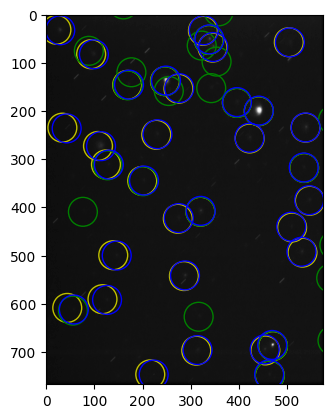

In [257]:
# Draw data
xy = a.RADEC_to_PlaneXY(a.stars).transpose()
plt.imshow(a.data, cmap="Greys_r")
_ = CircularAperture(XY_real, r=30.0).plot(color="y")
_ = CircularAperture(xy, r=30.0).plot(color="g")
_ = CircularAperture(a.plane_objects, r=30.0).plot(color="b")

#plt.colorbar()
plt.show()


In [151]:
a.calibration()

Agulare distance  2d25m22.97333068s
Plane distance [-15.015438   435.19833202] ± [1.57871189 0.36256621]


In [50]:
a.center.separation(SkyCoord(np.pi,np.pi/2. - 1, 
                 unit=(u.rad,u.rad), 
                 frame="icrs")), a.center

(<Angle 81.87699667 deg>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (285.99925417, 37.13693139)>)

In [36]:
a.observation_time.sidereal_time('apparent').radian, a.local_sidereal_time

(np.float64(3.3617344529283195), np.float64(3.3617575756928786))

In [11]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, HADec
from astropy.time import Time
obstime = Time(f'{head["DATE-OBS"]}T{head["TIME-OBS"]}')
location = EarthLocation(lon=lon * u.deg,lat=lat * u.deg, height = 100 * u.m)
frame = AltAz(obstime=obstime, location=location)
cr = a.center


#cr.transform_to(frame).ha.radian, a.local_siderial_time, a.center.ra.radian
#cr.

In [15]:
cr.transform_to(frame).az

<Longitude 61.75211603 deg>

In [51]:
a.center.cartesian.transform(a.rotation_matrix)


<CartesianRepresentation (x, y, z) [dimensionless]
    (-0.20767358, 0.16619943, 0.96397585)>

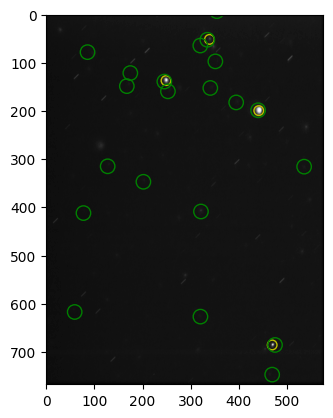

In [60]:
# Draw data
plt.imshow(data, cmap="Greys_r")
_ = CircularAperture(xy_1, r=10.0).plot(color="y")
_ = CircularAperture(xy_3, r=15.0).plot(color="g")

#plt.colorbar()
plt.show()

<h2>Шукаємо відповідники</h2>

In [93]:
xy_test = one(xy_1,xy_2,19,gap_value = 13,accuracy=[0,0], aperture=[3,np.deg2rad(3)])
xy_test

Something go wrong. Increse accuracy


[]

In [92]:
%%timeit
s_2 = ShiftFinder(xy_1,xy_2,N=19,gap_value=13,aperture=[3,np.deg2rad(3)])
xy_test = s_2.one_by_one(3)
xy_test

41.5 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<h2>Шукаємо усереднине значення зсуву</h2>

In [76]:
m = np.zeros((len(xy_test),2))
j = 0
mean = 0
for i in range(len(xy_test)):
    if(xy_test[i] == -1):
        continue
    j+=1
    m[i,:] = xy_1[i] - xy_2[xy_test[i]]
    mean += m[i,:]
#m, np.delete(m,np.argwhere(m == 0))
vector = mean/j
vector, m


(array([253.1454785 , -29.29838018]),
 array([[254.47238106, -27.2327507 ],
        [251.91956663, -25.12883612],
        [253.61692029, -34.5553873 ],
        [252.97633968, -24.14564836],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [252.55553795, -29.23850571],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [253.33212538, -35.48915287],
        [  0.        ,   0.        ]]))

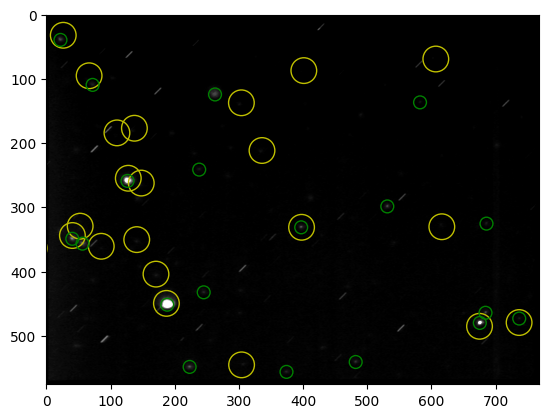

In [77]:
# формування списку координат для побудови зображення
xy = [[Y[i]+vector[0], X[i]+vector[1]] for i in range(len(X))]
# Draw data
plt.imshow(data, vmin=np.median(data), vmax=3 * np.median(data), cmap="Greys_r")
_ = CircularAperture(xy, r=20.0).plot(color="y")
_ = CircularAperture(xy_1, r=10.0).plot(color="g")
#plt.colorbar()
plt.show()

<h1>Поворот зображення</h1>

In [73]:
#Для визначення куту повороту ми скористуємося цим співідношенням
r_matrix =  matrix(-(np.pi/2.-center_declination),"y") @ (
            matrix(-center_hour_angle,"z") @ (
            matrix(-(np.pi/2.-fi),"y").transpose() @ (
            matrix(-center_A,"z").transpose() @ matrix(-(np.pi/2.-center_h),"y").transpose())))
# Щоб дізнатися кут ми беремо arccos
rot_angle = np.acos(r_matrix[0,0])

In [74]:
# множимо отримані данні на матрицю повороту
r_xyz = pd.DataFrame((matrix(-rot_angle,"z") @ xyz.values.transpose()).transpose(),columns=["x","y","z"])
# Переводимо їх у площину кадру
r_X, r_Y = cartesian_to_plane(r_xyz["x"].values,r_xyz["y"].values,
                             naxis = (head["NAXIS1"],head["NAXIS2"]),
                             fov=np.deg2rad((3,4)), 
                             orientation=(1,1))

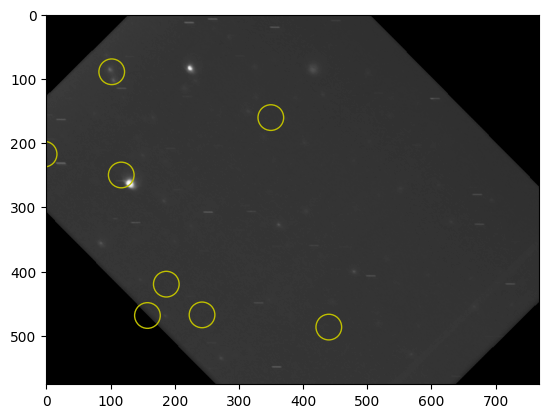

In [86]:
from scipy import ndimage
from astropy.coordinates import Angle

r_xy = [[r_Y[i]+200, r_X[i]] for i in range(len(X))]
# Повертаємо зображення
rotated = ndimage.rotate(data,-np.rad2deg(np.acos(7.01617457e-01)),reshape=False)
plt.imshow(rotated, cmap="Greys_r")
_ = CircularAperture(r_xy, r=20.0).plot(color="y")


In [7]:
xy_1 = [[Y[i], X[i]] for i in range(len(X))]
xy_2 = [[Y[i]+100, X[i]+50] for i in range(len(X))]

np.random.shuffle(xy_2)
xy_3 = xy_2 - np.random.rand(1628,2)*2        

In [8]:
xy_1 = np.array(xy_1)
xy_2 = np.array(xy_2)

Вирахування постійних кадру

In [ ]:
plate_1 = lambda x,y: np.array([x[:], y[:], np.ones(len(x))]).transpose()
plate_2 = lambda x,y: np.array([x, y, 1, np.pow(x,2), x*y, np.pow(y,2)])
#plate_3 = lambda x,y: np.array([x, y, 1, np.pow(x,2), x*y, np.pow(y,2), np.pow(x,3), 3*np.pow(x,2)*y, 3*x*np.pow(y,2), np.pow(y,3)])
 

def param(xy_1: np.ndarray, xy_2: np.ndarray):
    # xy_1 - coordinate from plate
    temp = xy_2 - xy_1

    Q = plate_1(xy_1[:,0],xy_1[:,0])
    temp_plate = np.linalg.inv(Q.transpose() @ Q) @ Q.transpose()

    X_param = temp_plate @ temp[:,0]
    Y_param = temp_plate @ temp[:,1]
    
    return np.array([X_param,Y_param])

def real_coordinate(xy_1: np.ndarray, param: np.ndarray):
    xy = np.empty(xy_1.shape)
    
    Q = plate_1(xy_1[:,0],xy_1[:,0])
    
    xy[:,0] = xy_1[:,0] + Q @ param[:,0]
    xy[:,1] = xy_1[:,1] + Q @ param[:,1]
    
    return xy
    